# <center>Predict The Patients Of Lungcancer are Survive or not <center>

&nbsp;

This database is a comprehensive collection of patient information, specifically focused on individuals diagnosed with cancer. It is designed to facilitate the analysis of various factors that may influence cancer prognosis and treatment outcomes.Depth analysis and research, making it possible to identify patterns, correlations, and potential causal relationships between various factors and cancer outcomes. It is a valuable resource for medical researchers, epidemiologists, and healthcare providers aiming to improve cancer treatment and patient care.Currently the process they are following,
    
* They first indentify a Data.
* Then Some preprocessing work had be done.
* At the end the Classification Model had been developed that predict that either patient was survived or not.
    
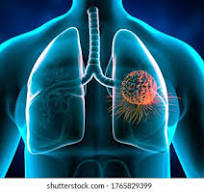

### Lets import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.express as px
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16, 5)

### Read Daataset

In [2]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\Lung Cancer dataset.zip")

In [3]:
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Croatia,2016-04-05,Stage I,Yes,Current Smoker,27.3,196,0,1,0,0,Radiation,2018-01-09,0
1,2,50.0,Female,Italy,2023-04-20,Stage III,No,Passive Smoker,22.4,234,1,1,1,0,Chemotherapy,2023-11-28,0
2,3,65.0,Male,Slovakia,2023-04-05,Stage IV,No,Former Smoker,20.2,210,0,0,0,0,Chemotherapy,2025-01-12,0
3,4,51.0,Female,Greece,2016-02-05,Stage III,Yes,Never Smoked,41.8,262,1,0,1,0,Surgery,2016-11-14,0
4,5,37.0,Female,Slovakia,2023-11-29,Stage III,Yes,Passive Smoker,33.5,262,0,0,0,0,Chemotherapy,2025-03-10,0


## Lets Understand Columns

* **id:** A unique identifier for each patient in the dataset.
* **age:** The age of the patient at the time of diagnosis.
* **gender:** The gender of the patient (e.g., male, female).
* **country:** The country or region where the patient resides.
* **diagnosis_date:** The date on which the patient was diagnosed with lung cancer.
* **cancer_stage:** The stage of lung cancer at the time of diagnosis (e.g., Stage I, Stage II, Stage III, Stage IV).
* **family_history:** Indicates whether there is a family history of cancer (e.g., yes, no).
* **smoking_status:** The smoking status of the patient (e.g., current smoker, former smoker, never smoked, passive smoker).
* **bmi:** The Body Mass Index of the patient at the time of diagnosis.
* **cholesterol_level:** The cholesterol level of the patient (value).
* **hypertension:** Indicates whether the patient has hypertension (high blood pressure) (e.g., yes, no).
* **asthma:** Indicates whether the patient has asthma (e.g., yes, no).
* **cirrhosis:** Indicates whether the patient has cirrhosis of the liver (e.g., yes, no).
* **other_cancer:** Indicates whether the patient has had any other type of cancer in addition to the primary     diagnosis(e.g.,yes,no).      
* **treatment_type:** The type of treatment the patient received (e.g., surgery, chemotherapy, radiation, combined).
* **end_treatment_date:** The date on which the patient completed their cancer treatment or died.
* **survived:** Indicates whether the patient survived (e.g., yes, no).


## Lets Understand Dataset

In [4]:
df.shape

(56000, 17)

* **This Dataset have 56000 Raws and 17 Columns**

In [5]:
df.describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000
mean,28000.500000,54.924929,30.576352,233.891286,0.746018,0.471161,0.229679,0.087643,0.222107
std,16165.951874,9.995458,8.387948,43.470036,0.435291,0.499172,0.420630,0.282777,0.415667
min,1.000000,15.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14000.750000,48.000000,23.300000,197.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28000.500000,55.000000,30.600000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,42000.250000,62.000000,37.900000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,56000.000000,101.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  56000 non-null  int64  
 1   age                 56000 non-null  float64
 2   gender              56000 non-null  object 
 3   country             56000 non-null  object 
 4   diagnosis_date      56000 non-null  object 
 5   cancer_stage        56000 non-null  object 
 6   family_history      56000 non-null  object 
 7   smoking_status      56000 non-null  object 
 8   bmi                 56000 non-null  float64
 9   cholesterol_level   56000 non-null  int64  
 10  hypertension        56000 non-null  int64  
 11  asthma              56000 non-null  int64  
 12  cirrhosis           56000 non-null  int64  
 13  other_cancer        56000 non-null  int64  
 14  treatment_type      56000 non-null  object 
 15  end_treatment_date  56000 non-null  object 
 16  surv

In [7]:
df.isnull().sum()

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64

* **_Observation_**

* This dataset don't have any null values.
* In this dataset we have float, int, object types of data.
* Two columns (1) diagnosis_date and (2) end_treatment_date are int type in this dataset so convert them into Date type.

In [8]:
# We create a new column days_under_supervision by subtracting dignosis_date and end_treatment_date

df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'])
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'])
df['days_under_supervision'] = df['end_treatment_date'] - df['diagnosis_date']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   id                      56000 non-null  int64          
 1   age                     56000 non-null  float64        
 2   gender                  56000 non-null  object         
 3   country                 56000 non-null  object         
 4   diagnosis_date          56000 non-null  datetime64[ns] 
 5   cancer_stage            56000 non-null  object         
 6   family_history          56000 non-null  object         
 7   smoking_status          56000 non-null  object         
 8   bmi                     56000 non-null  float64        
 9   cholesterol_level       56000 non-null  int64          
 10  hypertension            56000 non-null  int64          
 11  asthma                  56000 non-null  int64          
 12  cirrhosis               56000 no

In [10]:
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,days_under_supervision
0,1,64.0,Male,Croatia,2016-04-05,Stage I,Yes,Current Smoker,27.3,196,0,1,0,0,Radiation,2018-01-09,0,644 days
1,2,50.0,Female,Italy,2023-04-20,Stage III,No,Passive Smoker,22.4,234,1,1,1,0,Chemotherapy,2023-11-28,0,222 days
2,3,65.0,Male,Slovakia,2023-04-05,Stage IV,No,Former Smoker,20.2,210,0,0,0,0,Chemotherapy,2025-01-12,0,648 days
3,4,51.0,Female,Greece,2016-02-05,Stage III,Yes,Never Smoked,41.8,262,1,0,1,0,Surgery,2016-11-14,0,283 days
4,5,37.0,Female,Slovakia,2023-11-29,Stage III,Yes,Passive Smoker,33.5,262,0,0,0,0,Chemotherapy,2025-03-10,0,467 days


In [11]:
# Drop columns dignosis_date,end_treatment_date , id

df.drop(['diagnosis_date' , 'end_treatment_date', 'id'], axis = 1, inplace = True)

In [12]:
df.head()

,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,days_under_supervision
0,64.0,Male,Croatia,Stage I,Yes,Current Smoker,27.3,196,0,1,0,0,Radiation,0,644 days
1,50.0,Female,Italy,Stage III,No,Passive Smoker,22.4,234,1,1,1,0,Chemotherapy,0,222 days
2,65.0,Male,Slovakia,Stage IV,No,Former Smoker,20.2,210,0,0,0,0,Chemotherapy,0,648 days
3,51.0,Female,Greece,Stage III,Yes,Never Smoked,41.8,262,1,0,1,0,Surgery,0,283 days
4,37.0,Female,Slovakia,Stage III,Yes,Passive Smoker,33.5,262,0,0,0,0,Chemotherapy,0,467 days


## Data Visulization

### Univariate Visualization 

In [13]:
# Lets Visualize Age Column
df['age'].unique()

array([ 64.,  50.,  65.,  51.,  37.,  49.,  56.,  48.,  47.,  67.,  45.,
        46.,  21.,  62.,  60.,  57.,  36.,  61.,  71.,  74.,  35.,  54.,
        44.,  68.,  59.,  58.,  63.,  69.,  70.,  52.,  40.,  78.,  75.,
        72.,  42.,  53.,  39.,  66.,  41.,  43.,  55.,  38.,  30.,  34.,
        76.,  73.,  80.,  31.,  85.,  28.,  79.,  87.,  77.,  33.,  32.,
        25.,  90.,  84.,  81.,  27.,  82.,  83.,  22.,  86.,  26.,  93.,
        29.,  23.,  19.,  24.,  89.,  18.,  91.,  95.,  88.,  20.,  94.,
       101.,  15.])

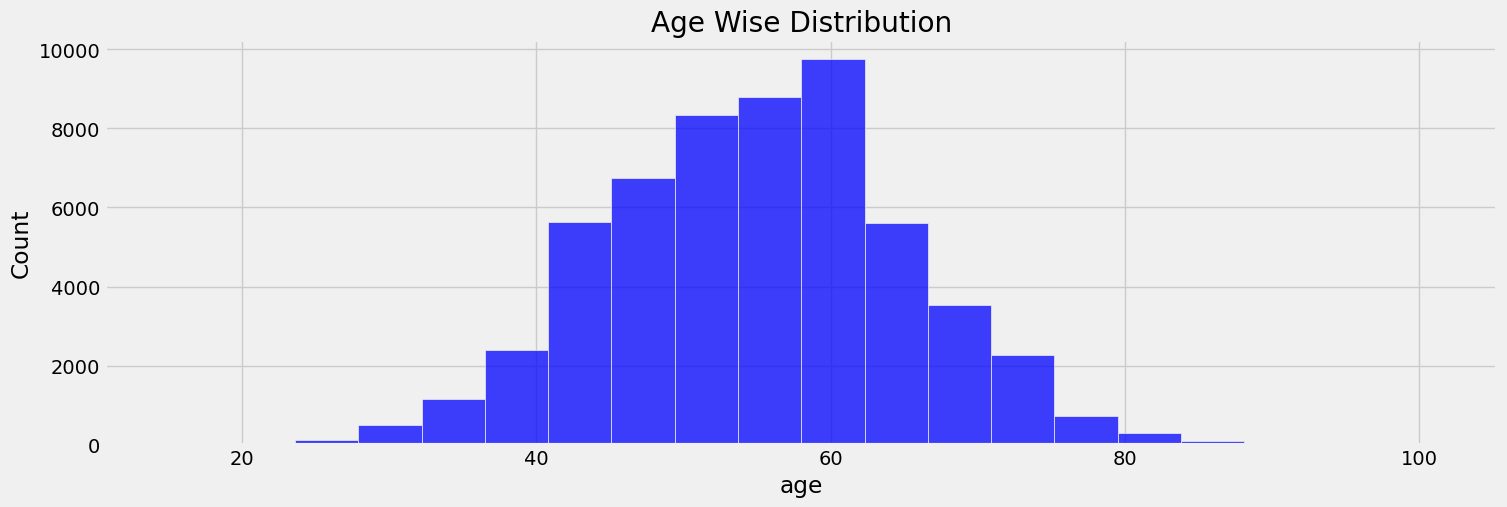

In [14]:
sns.histplot(x = df['age'],bins = 20,color = 'Blue')
plt.title('Age Wise Distribution')
plt.show()

* Above this chart we can conclude that maximum number of patient for predict lung cancer is in the age of **65**.
* Minimum number of patient for for predict lung cancer is in the age of **15** and **90**.

In [15]:
# Lets Visualize Gender column
df['gender'].value_counts()

Female    28013
Male      27987
Name: gender, dtype: int64

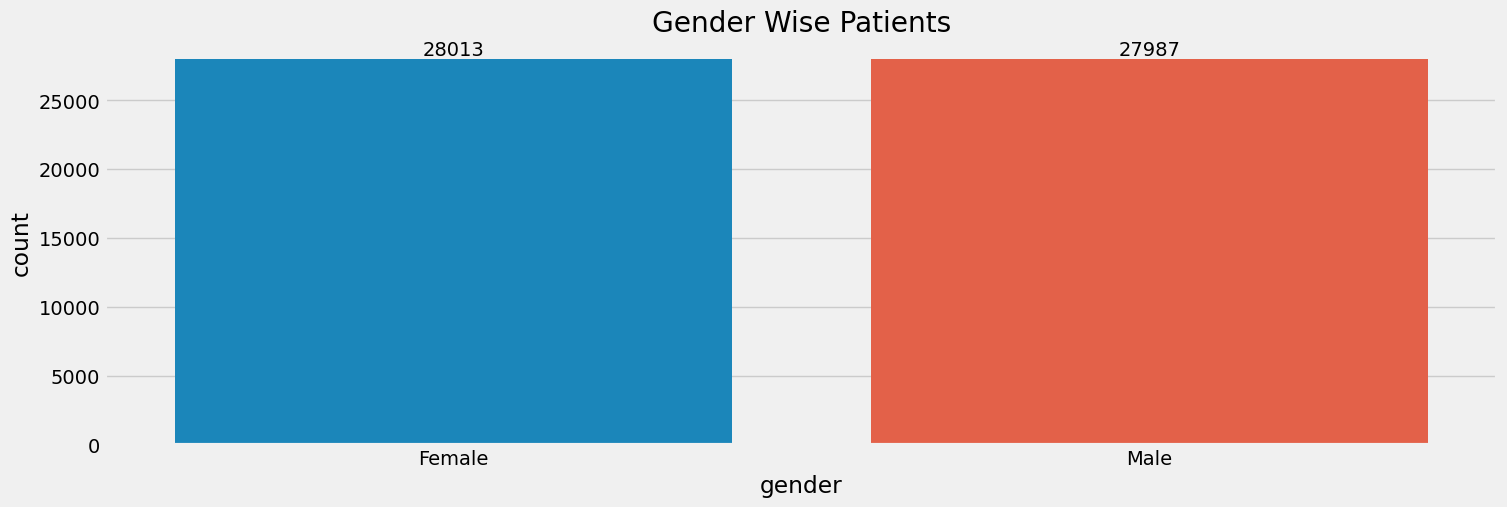

In [16]:
ax = sns.countplot(x=df['gender'],
                   order=df['gender'].value_counts(ascending=False).index);

abs_values = df['gender'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title('Gender Wise Patients')
plt.show()

* From Above chart we can observe that maximum patients dignosed cancer are female about **28013** and male patient dignosed cancer are **27987**.

In [17]:
# Lets visualize country coulmn
df['country'].value_counts()

Lithuania         2149
Malta             2133
Spain             2125
Greece            2120
Denmark           2115
Bulgaria          2115
Czech Republic    2115
Hungary           2113
Cyprus            2110
Portugal          2098
Finland           2087
Croatia           2084
Ireland           2083
Italy             2081
Austria           2080
Poland            2072
Latvia            2059
Netherlands       2047
Slovakia          2047
Germany           2037
Romania           2035
Slovenia          2031
France            2023
Luxembourg        2019
Belgium           2018
Estonia           2015
Sweden            1989
Name: country, dtype: int64

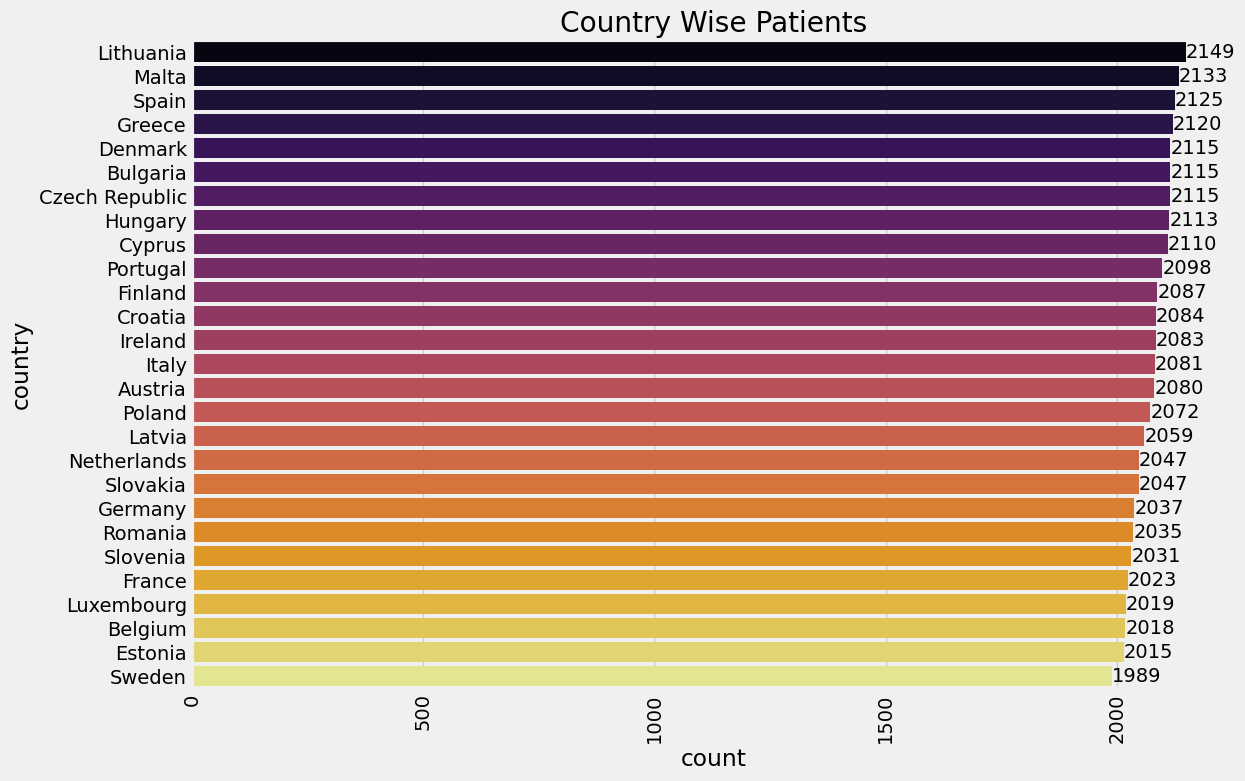

In [18]:
plt.rcParams['figure.figsize'] = (12,8)
ax = sns.countplot(y = df['country'],
                   order=df['country'].value_counts(ascending=False).index, palette = 'inferno');

abs_values = df['country'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title('Country Wise Patients')
plt.xticks(rotation = 90)
plt.show()

* From above chart we can observe that Maximum **2149** no patients of lung cancer in Lithuania and Minimum **1989** no patients in Sweden. 

In [19]:
df.columns

Index(['age', 'gender', 'country', 'cancer_stage', 'family_history',
       'smoking_status', 'bmi', 'cholesterol_level', 'hypertension', 'asthma',
       'cirrhosis', 'other_cancer', 'treatment_type', 'survived',
       'days_under_supervision'],
      dtype='object')

In [20]:
# Lets Visualize Cancer_Stage column
df['cancer_stage'].value_counts()

Stage I      14035
Stage II     14011
Stage IV     14006
Stage III    13948
Name: cancer_stage, dtype: int64

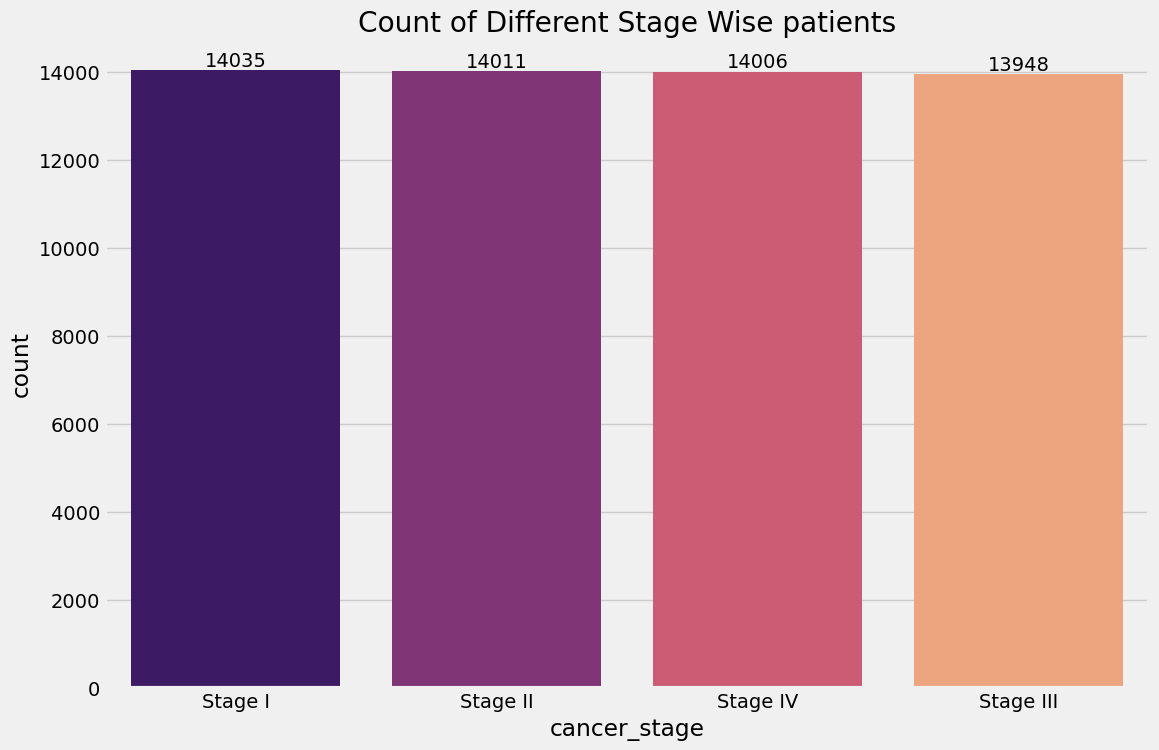

In [21]:
ax = sns.countplot(x = df['cancer_stage'],
                   order=df['cancer_stage'].value_counts(ascending=False).index, palette = 'magma');

abs_values = df['cancer_stage'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title('Count of Different Stage Wise patients')
plt.show()

**Observation of Cancer stage of patients**

* There was maximum patients **14035** patients of Stage I.
* There was **14011** patients of Stage II.
* There was **14006** patients of Stage IV.
* There was minimum patients **13948** patients of Stage III. 

In [22]:
# Lets Visualize Family history column

df['family_history'].value_counts()

Yes    28101
No     27899
Name: family_history, dtype: int64

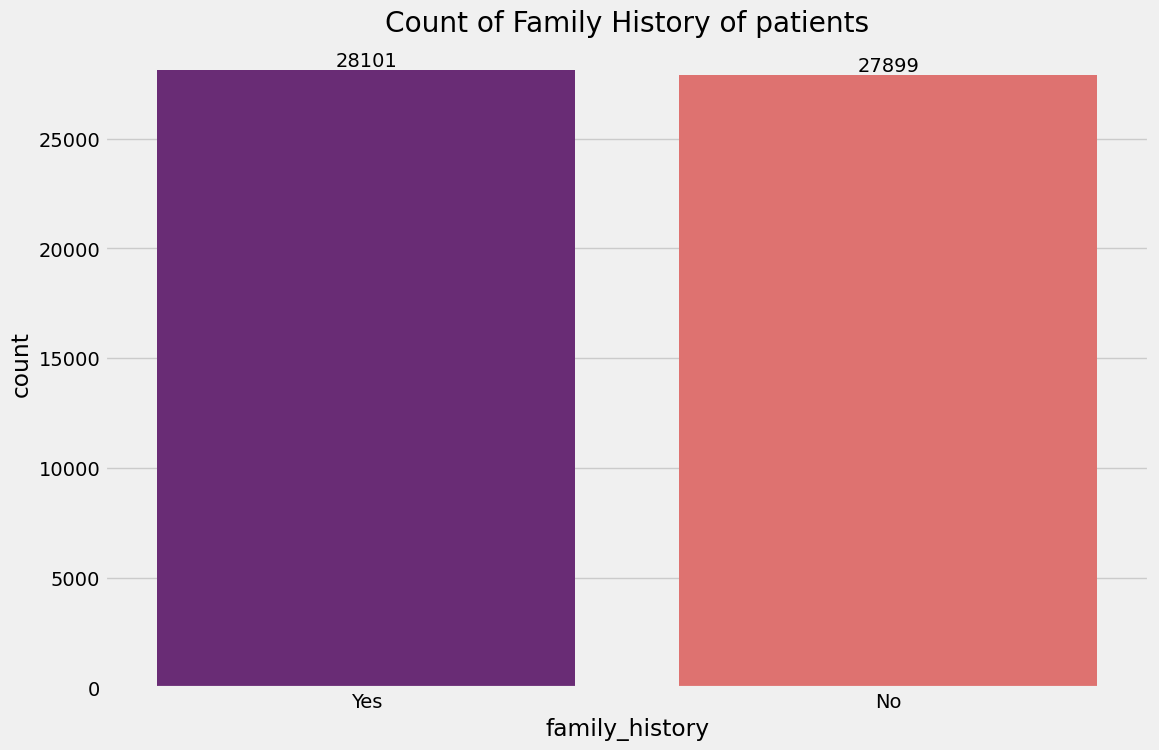

In [23]:
ax = sns.countplot(x = df['family_history'],
                   order=df['family_history'].value_counts(ascending=False).index, palette = 'magma');

abs_values = df['family_history'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title('Count of Family History of patients')
plt.show()

* From above chart we can observe that **28101** patients have cancer one of them family member and 27899 patients doesn't have cancer in there family.

In [24]:
# Lets check if patients had done either smoking or not

df['smoking_status'].value_counts()

Current Smoker    14056
Passive Smoker    14021
Former Smoker     13973
Never Smoked      13950
Name: smoking_status, dtype: int64

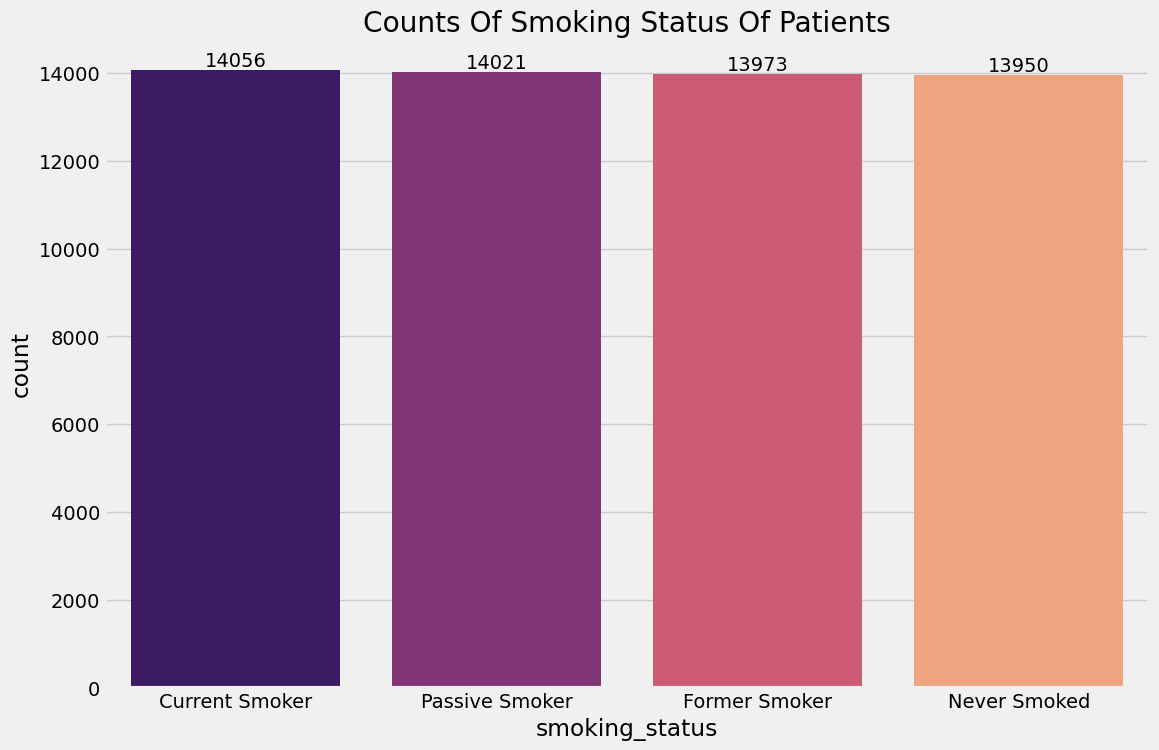

In [25]:
ax = sns.countplot(x = df['smoking_status'],
                   order=df['smoking_status'].value_counts(ascending=False).index, palette = 'magma');

abs_values = df['smoking_status'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title('Counts Of Smoking Status Of Patients')
plt.show()

**Observation of Smoking Status of patients**

* There was maximum **14056** patients were current smoker.
* There were **14021** patient were Passive Smoker.It means the patients would not done directly smoking they breathing in other people's tobacco smoke.
* There was **13973** patients were Former Smoker.
* There was minimum patients **13950** were Never smoked in their life, though they had lung cancer.

In [26]:
df['cholesterol_level'].unique()

array([196, 234, 210, 262, 277, 182, 292, 217, 252, 264, 259, 291, 237,
       183, 206, 283, 298, 285, 280, 269, 171, 278, 299, 248, 257, 158,
       205, 267, 271, 266, 293, 276, 284, 218, 227, 150, 242, 178, 288,
       193, 207, 168, 289, 287, 260, 255, 256, 176, 159, 177, 174, 164,
       279, 231, 245, 200, 212, 235, 160, 239, 199, 263, 222, 221, 195,
       296, 297, 203, 188, 273, 155, 241, 282, 294, 244, 189, 166, 251,
       172, 274, 184, 290, 228, 181, 258, 243, 157, 236, 161, 202, 275,
       247, 173, 268, 220, 226, 153, 295, 224, 229, 152, 167, 165, 197,
       209, 180, 265, 192, 204, 261, 186, 213, 163, 151, 232, 270, 187,
       201, 179, 254, 223, 253, 169, 250, 240, 246, 286, 219, 175, 230,
       211, 272, 238, 225, 249, 233, 214, 300, 208, 190, 170, 281, 156,
       198, 162, 185, 216, 191, 194, 215, 154], dtype=int64)

In [27]:
df['cholesterol_level'].value_counts()

244    550
293    519
255    516
253    515
285    514
      ... 
188    270
166    270
204    267
300    229
150    161
Name: cholesterol_level, Length: 151, dtype: int64

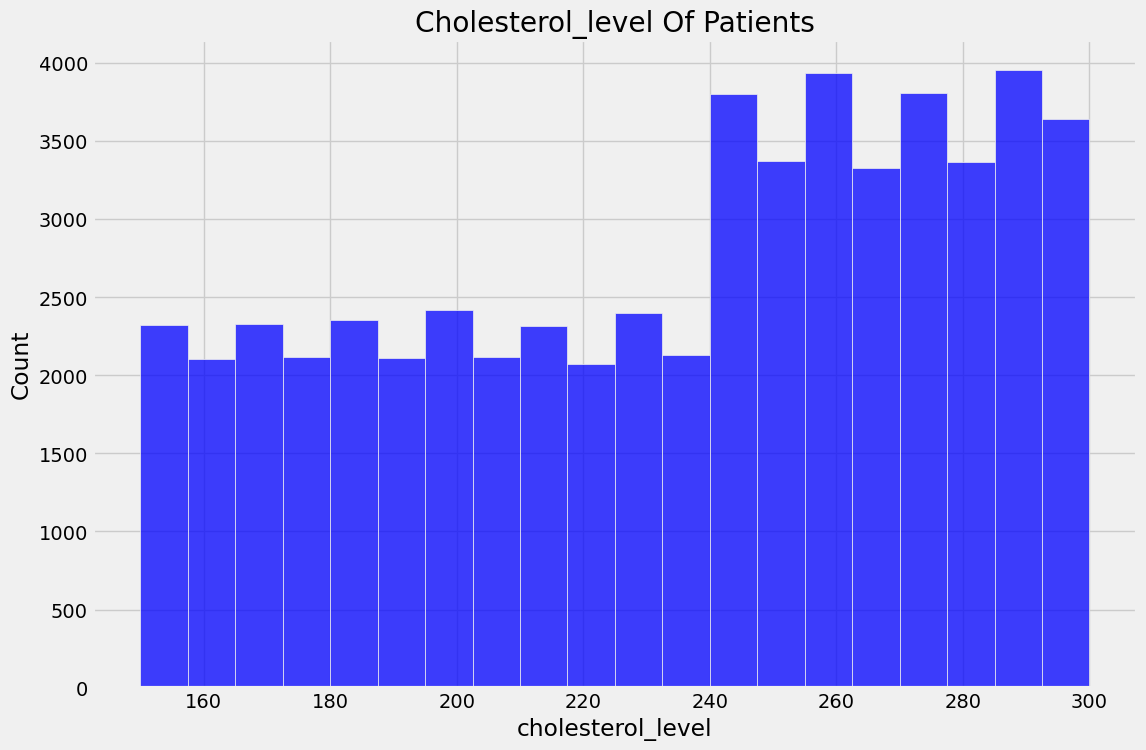

In [28]:
# Lets Analyze cholesterol_level column
sns.histplot(x = df['cholesterol_level'],bins = 20,color = 'Blue')
plt.title('Cholesterol_level Of Patients')
plt.show()


In [29]:
df['hypertension'].value_counts()

1    41777
0    14223
Name: hypertension, dtype: int64

In [30]:
df['asthma'].value_counts()

0    29615
1    26385
Name: asthma, dtype: int64

In [31]:
df['cirrhosis'].value_counts()

0    43138
1    12862
Name: cirrhosis, dtype: int64

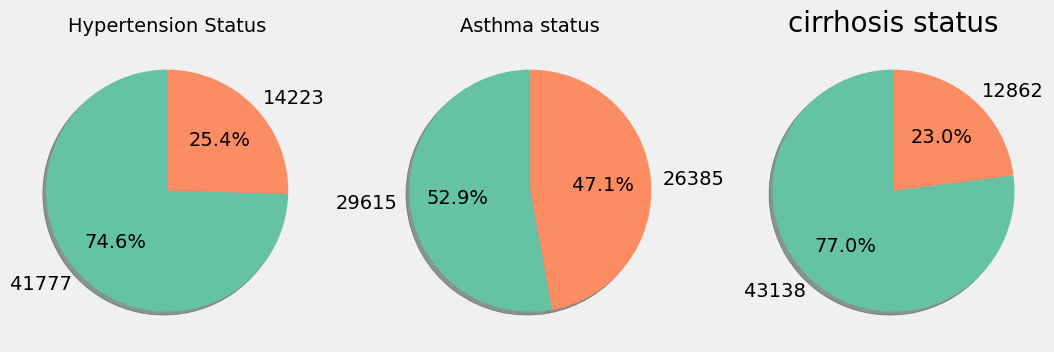

In [32]:
# Lets visualize hypertension, asthma, cirrhosis, other_cancer columns
plt.rcParams['figure.figsize'] = (16,4)
plt.style.use('fivethirtyeight')

# plotting a pie  hypertension chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 4, 1)
labels = ['41777','14223']
sizes = df['hypertension'].value_counts()
colors = sns.color_palette('Set2')
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90, autopct = '%0.1f%%')
plt.title('Hypertension Status', fontsize = 14)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 4, 2)
labels = ['29615','26385']
sizes = df['asthma'].value_counts()
colors = colors=sns.color_palette('Set2')
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90, autopct = '%0.1f%%')
plt.title('Asthma status', fontsize = 14)

# plotting a pie chart to represent share of Previous year Rating of the Employees
plt.subplot(1, 4, 3)
labels = ['43138', '12862']
sizes = df['cirrhosis'].value_counts()
colors = colors=sns.color_palette('Set2')
explode = [0,0]

plt.title('cirrhosis status', fontsize = 20)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90, autopct = '%0.1f%%')

plt.show()

* **Observation**
_From the above visualization we can observe following points._
* First pie chart is the chart of hypertension status of the patients.From this chart we can observe that about **74.5%** almost **41777** patients had hypertension and about **25.4%** almost **14223** patient did't have hypertension.
* Second pie chart is the chart of asthma status of the patients.From this chart we can observe that about **47.1%** about **26385** patients had asthma and about **52.9%** about **29615** patient did't have asthma.
* Third pie chart is the chart of cirrhosis status of the patients.From this chart we can observe that about **23%** about **12862** patients had cirrhosis and about **77%** about **43138** patient did't have cirrhosis. Cirrhosis is a condition in which the liver is scarred and permanently damaged.


In [33]:
df['other_cancer'].value_counts()

0    51092
1     4908
Name: other_cancer, dtype: int64

Text(0.5, 1.0, 'Other Cancer Status')

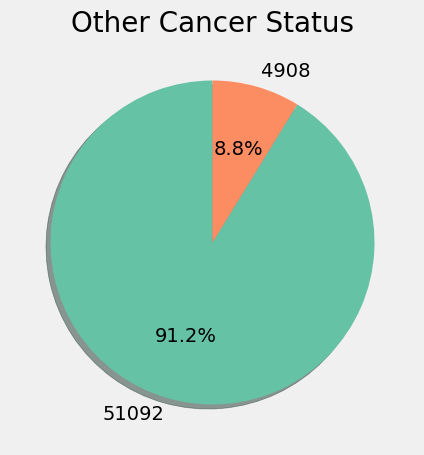

In [34]:
plt.rcParams['figure.figsize'] = (5,5)
sizes = df['other_cancer'].value_counts()
labels = ['51092','4908']
colors = colors=sns.color_palette('Set2')
         
plt.pie(sizes, labels = labels, colors = colors, shadow = True, startangle = 90, autopct = '%0.1f%%')
plt.title('Other Cancer Status', fontsize = 20)


* From the above chart we can conclude that about **8.8%** patients almost **4908** patients also had other type of cancer and **91.2%** patients almost **51092** patients didn't had other type of cancer.

In [35]:
df['treatment_type'].value_counts()

Chemotherapy    14112
Radiation       14074
Surgery         13915
Combined        13899
Name: treatment_type, dtype: int64

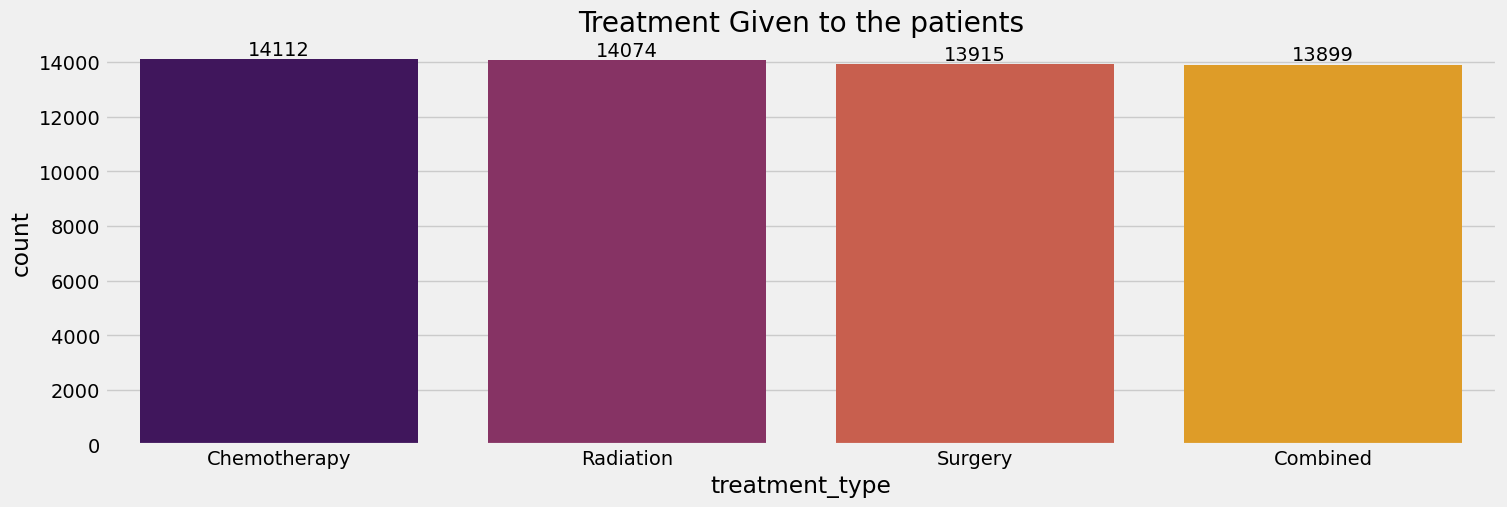

In [36]:
plt.rcParams['figure.figsize'] = (16, 5)
ax = sns.countplot(x = df['treatment_type'],
                   order=df['treatment_type'].value_counts(ascending=False).index, palette = 'inferno');

abs_values = df['treatment_type'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title('Treatment Given to t
          he patients')
plt.show()

**Observation**
From the above visualization we can observe following points.
* About **14112** patients were treated by Chemotherapy.
* About **14074** patients were treated by Radiation.
* About **13915** patients were treated by Surgery.
* About **13899** patients were treated by Combination of two or more treatments.

In [37]:
df['survived'].value_counts(normalize = True)*100

0    77.789286
1    22.210714
Name: survived, dtype: float64

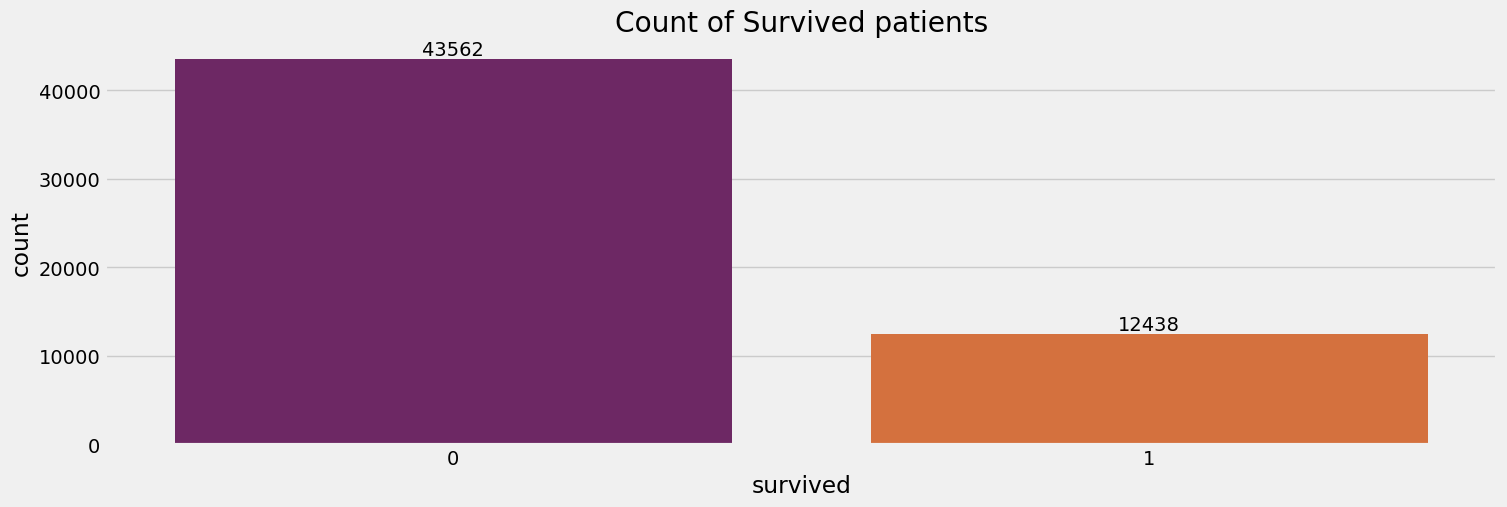

In [38]:
plt.rcParams['figure.figsize'] = (16, 5)
ax = sns.countplot(x = df['survived'],
                   order=df['survived'].value_counts(ascending=False).index, palette = 'inferno');

abs_values = df['survived'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title('Count of Survived patients')
plt.show()

from Above chart we can conclude following points.
* There were **77.79%** about **43562** patients can not survived.
* There were **22.21** about **12438** patients can survived . 

From the above visulization we can conclude that there was death rate in Lung Cancer is very high.

In [39]:
df['days_under_supervision'].value_counts().sort_index(ascending = False)

730 days    92
729 days    68
728 days    76
727 days    70
726 days    73
            ..
187 days    70
186 days    77
185 days    71
184 days    71
183 days    74
Name: days_under_supervision, Length: 548, dtype: int64

In [40]:
df['days_under_supervision']=df['days_under_supervision'].dt.days

In [41]:
df.shape

(56000, 15)

In [42]:
df.head()

,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,days_under_supervision
0,64.0,Male,Croatia,Stage I,Yes,Current Smoker,27.3,196,0,1,0,0,Radiation,0,644
1,50.0,Female,Italy,Stage III,No,Passive Smoker,22.4,234,1,1,1,0,Chemotherapy,0,222
2,65.0,Male,Slovakia,Stage IV,No,Former Smoker,20.2,210,0,0,0,0,Chemotherapy,0,648
3,51.0,Female,Greece,Stage III,Yes,Never Smoked,41.8,262,1,0,1,0,Surgery,0,283
4,37.0,Female,Slovakia,Stage III,Yes,Passive Smoker,33.5,262,0,0,0,0,Chemotherapy,0,467


## Binary Visualization

In [43]:
df.columns

Index(['age', 'gender', 'country', 'cancer_stage', 'family_history',
       'smoking_status', 'bmi', 'cholesterol_level', 'hypertension', 'asthma',
       'cirrhosis', 'other_cancer', 'treatment_type', 'survived',
       'days_under_supervision'],
      dtype='object')

In [1]:
# Lets visualize age and target columns
plt.rcParams['figure.figsize'] = (16, 5)
df[['age','survived']].groupby(['age']).count().plot(kind = 'bar')
plt.title('Age Wise Survival')
plt.show()

NameError: name 'plt' is not defined

* From the above chart we cn conclude that Maximum survival rate in age of 55 and 56 and minimum survival rate in age of 15 and 101.

gender  survived
Female  0           21815
        1            6198
Male    0           21747
        1            6240
Name: survived, dtype: int64


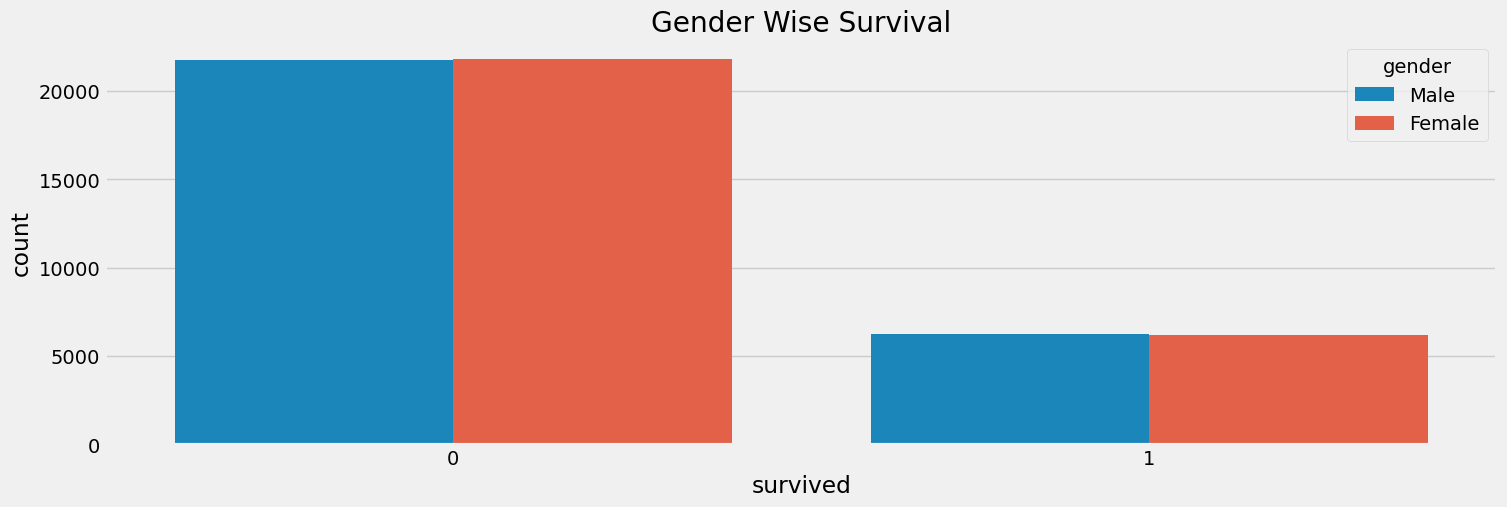

In [45]:
print(df['survived'].groupby(df['gender']).value_counts())
sns.countplot(data=df,x='survived',hue='gender')
plt.title('Gender Wise Survival')
plt.show()

From the above visualization we can observe the following points.
* We can saw that acording to survival maximum female about **21815** were not survived and **6198** were survived.
* WE can saw that about **21747** Male were not survived and about **6240** male were survived.

Comparing male and female survival rate of male is more than female.

cancer_stage  survived
Stage I       0           10930
              1            3105
Stage II      0           10873
              1            3138
Stage III     0           10880
              1            3068
Stage IV      0           10879
              1            3127
Name: survived, dtype: int64


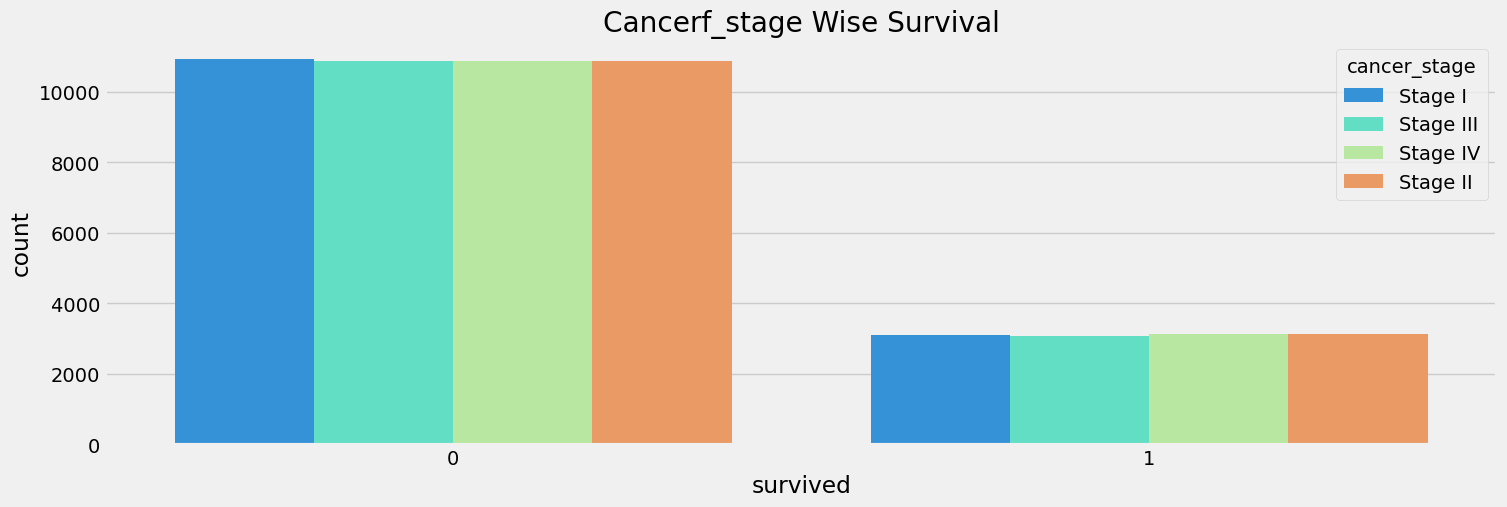

In [46]:
print(df['survived'].groupby(df['cancer_stage']).value_counts())
sns.countplot(data=df,x='survived',hue='cancer_stage', palette='rainbow')
plt.title('Cancerf_stage Wise Survival')
plt.show()

From the above visualization we can observe following points.

* In the Stage I **10930** patients can not survived and **3105** can survived.
* In the Stage II **10873** patients can not survived and **3138** can survived.
* In the Stage III **10880** patients can not survived and **3068** can survived.
* In the Stage IV  **10879** patients can not survived and **3127** can survived.

treatment_type  survived
Chemotherapy    0           10923
                1            3189
Combined        0           10804
                1            3095
Radiation       0           10970
                1            3104
Surgery         0           10865
                1            3050
Name: survived, dtype: int64


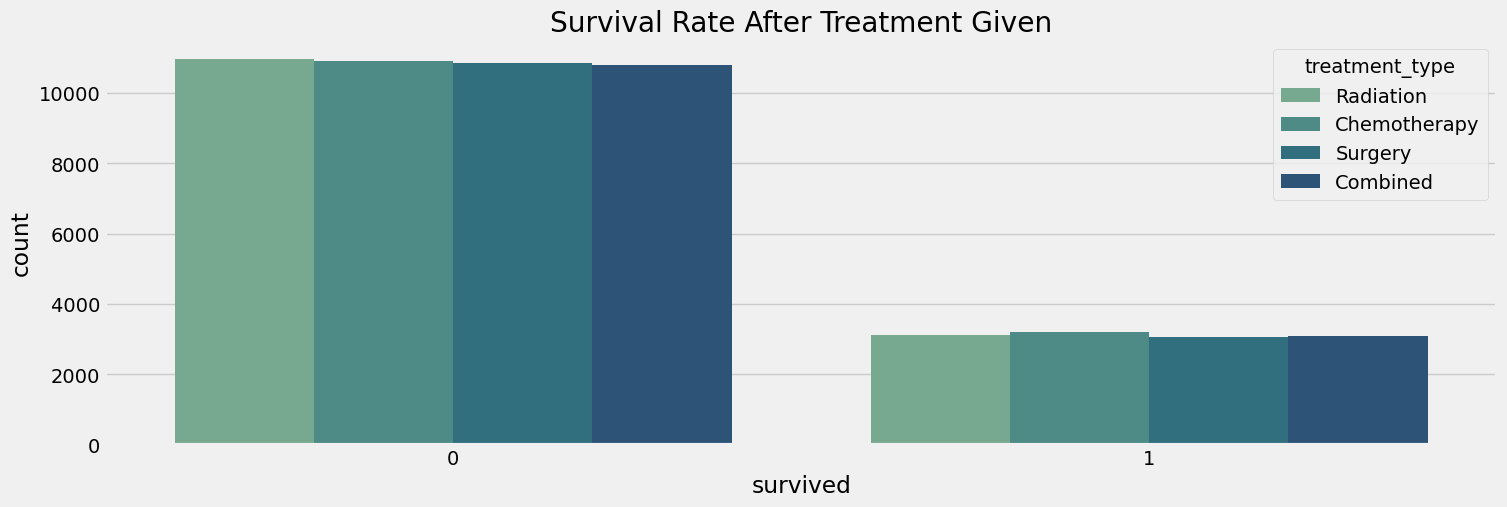

In [47]:
print(df['survived'].groupby(df['treatment_type']).value_counts())
sns.countplot(data=df,x='survived',hue='treatment_type', palette = 'crest')
plt.title('Survival Rate After Treatment Given')
plt.show()

From the above chart we can observe the following observation.

* After given the Chemotherapy **10923** Patients can not survived and **3189** patient can survived.
* After given the Combined treatment **10804** Patients can not survived and **3095** patient can survived.
* After given the Radiation **10970** Patients can not survived and **3104** patient can survived.
* After given the Surgery **10865** Patients can not survived and **3050** patient can survived.

## Multivariate Visualization

C:\Users\Dell\AppData\Local\Temp\ipykernel_4324\3231041812.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


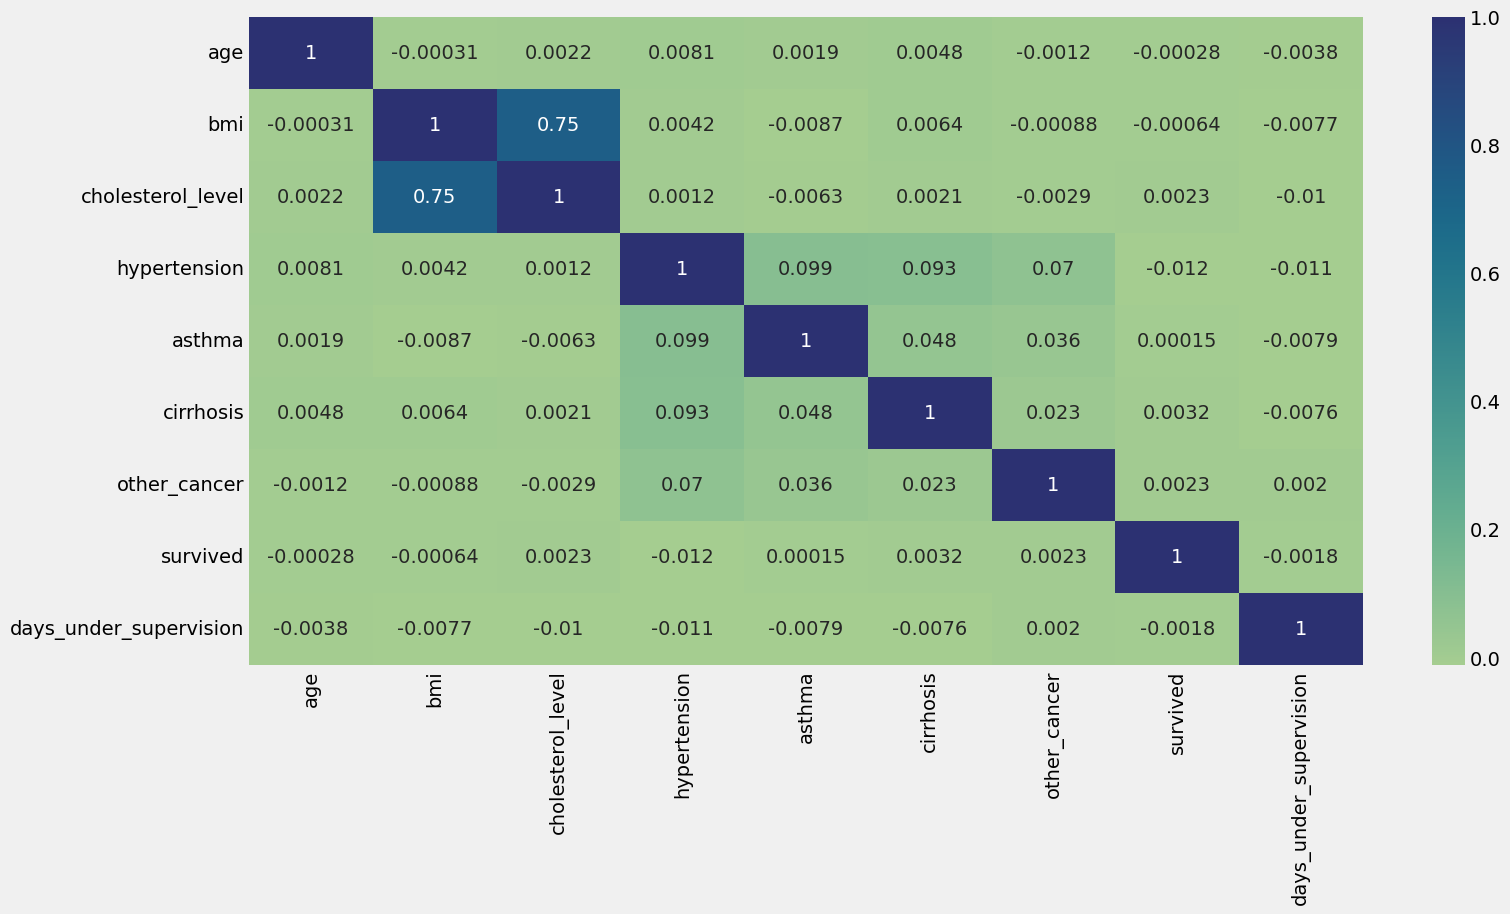

In [48]:
plt.rcParams['figure.figsize'] = (16, 8)
cor = df.corr()
sns.heatmap(cor,annot = True , cmap = 'crest')
plt.show()

* From above Heatmap we can say that data is highly co-related with each other.

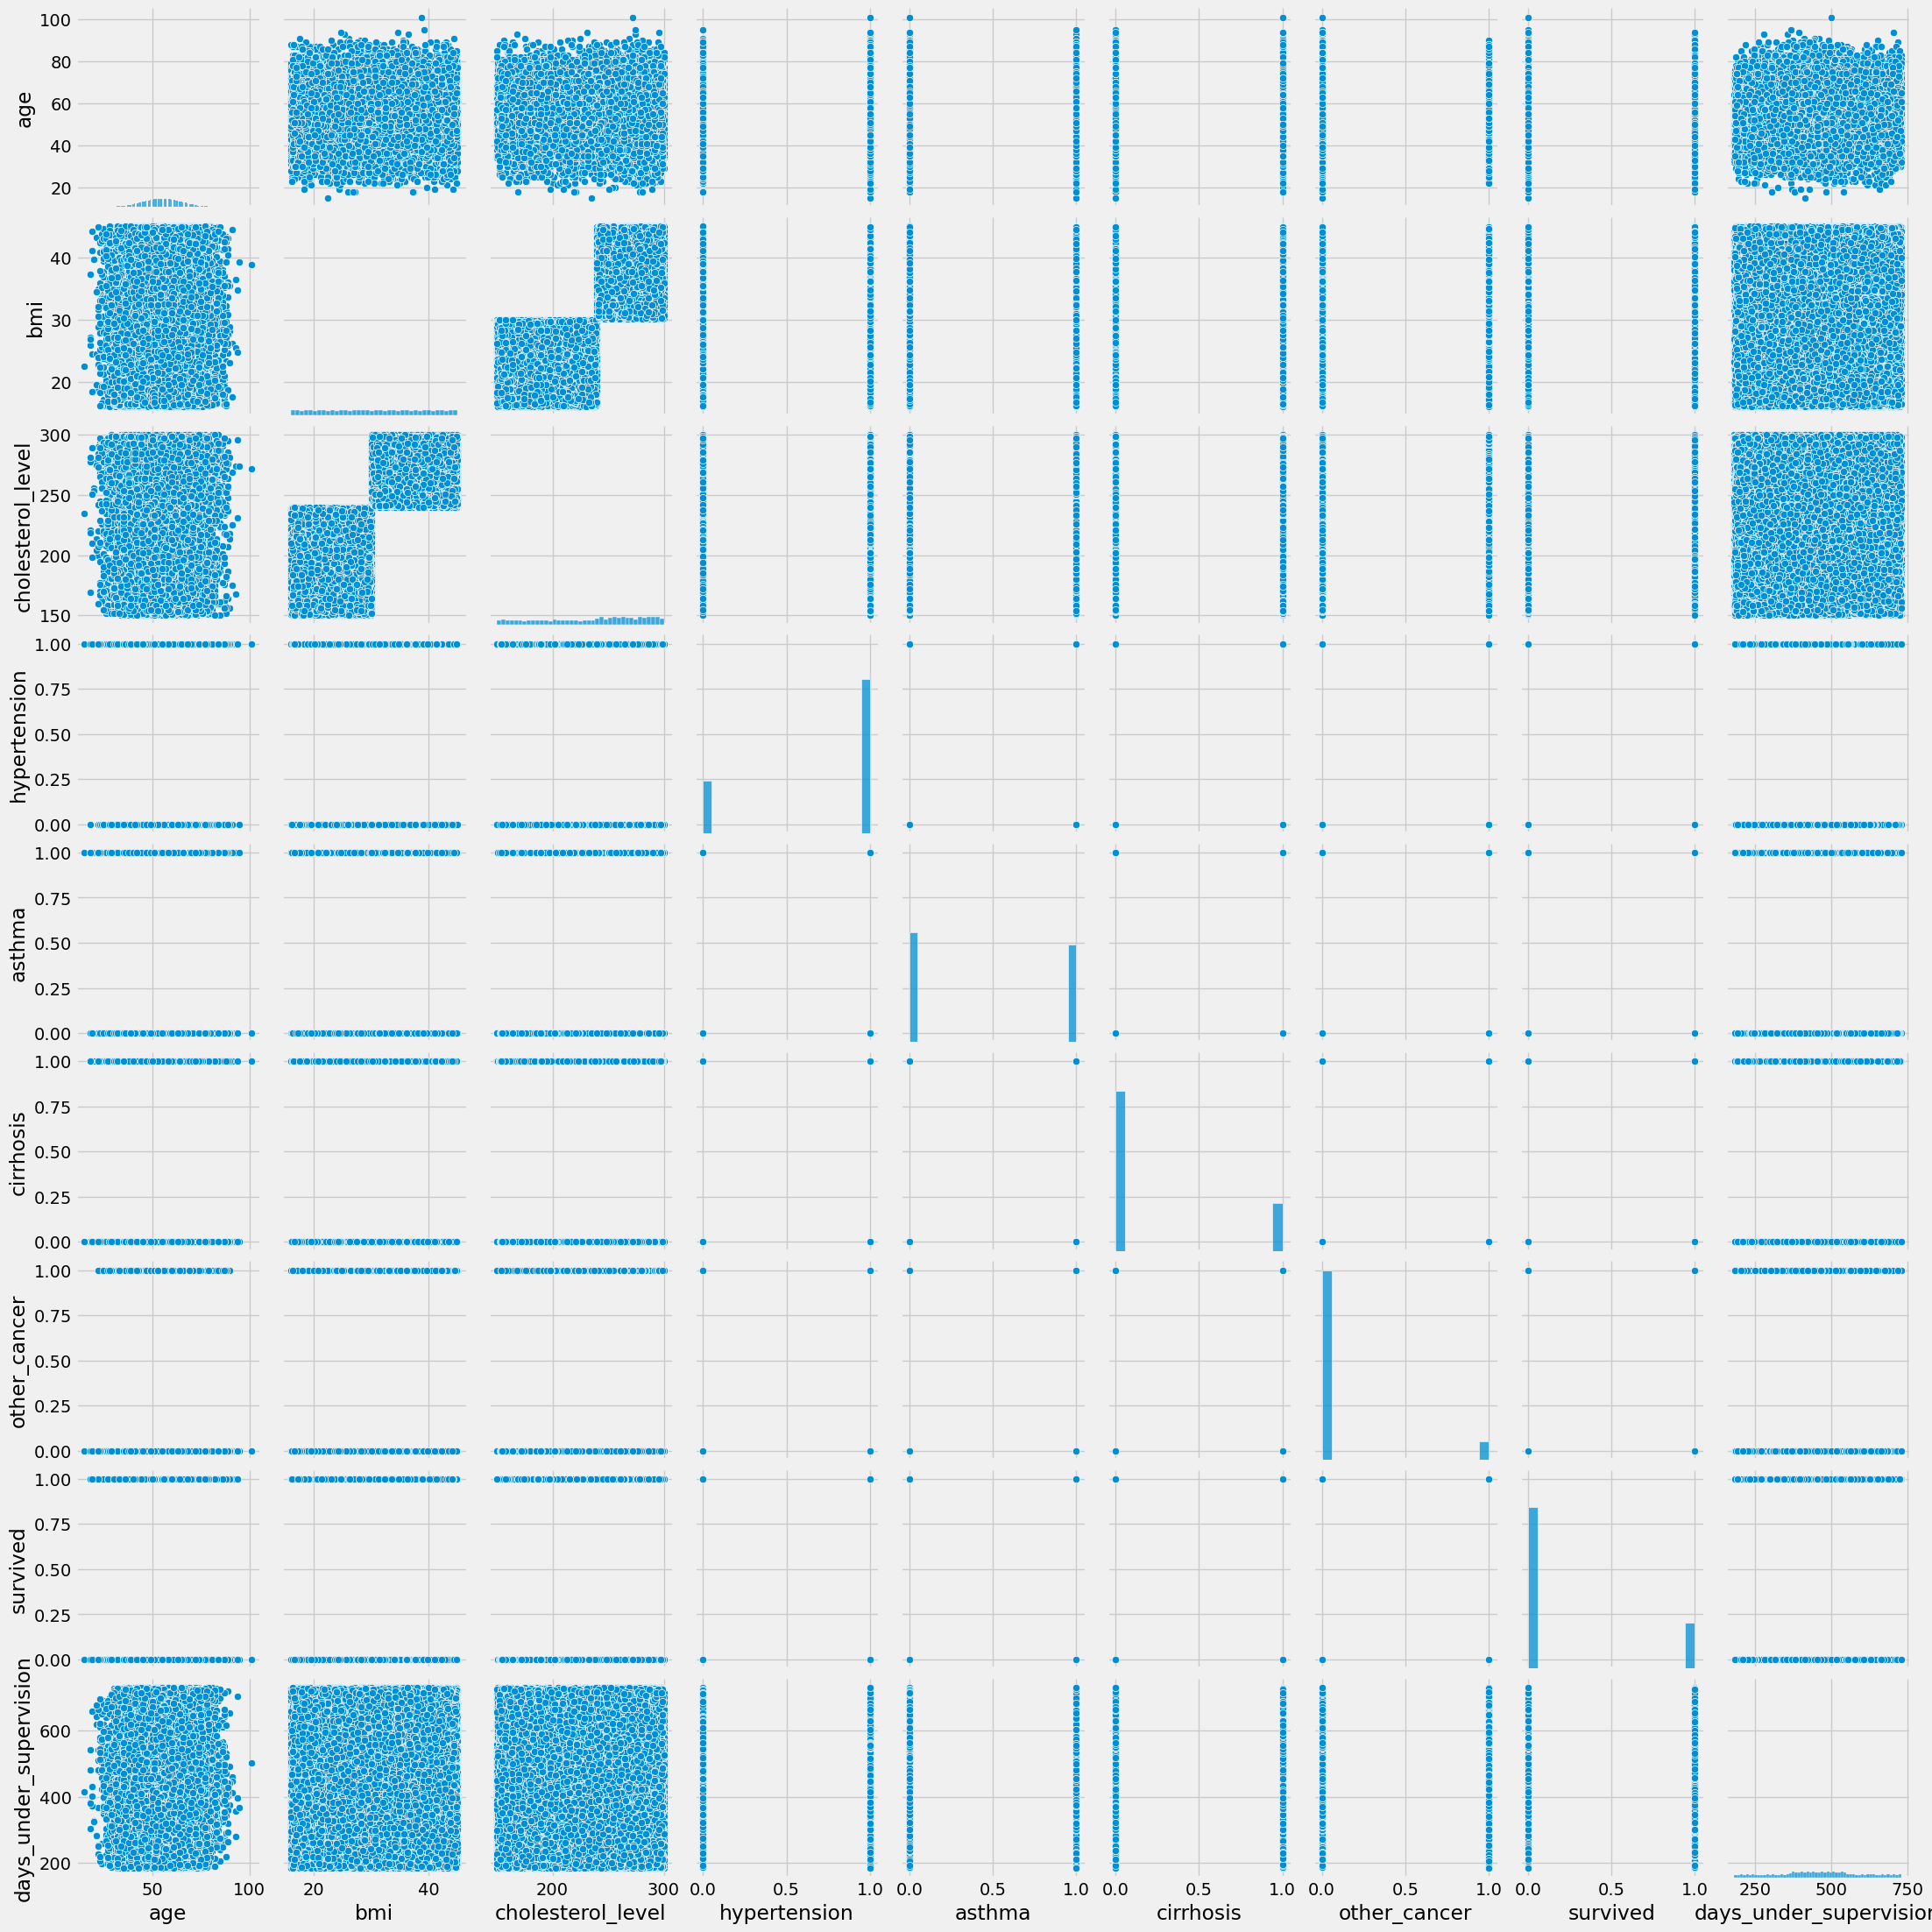

In [49]:
sns.pairplot(df)

# Data Preprocessing

* converting categorical features and binary features to numerical value as then only we can train our model...

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols = ['gender','country','cancer_stage','family_history','smoking_status','treatment_type']

for i in cols:
    df[i] = le.fit_transform(df[i])



In [51]:
df.head()

,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,days_under_supervision
0,64.0,1,3,0,1,0,27.3,196,0,1,0,0,2,0,644
1,50.0,0,14,2,0,3,22.4,234,1,1,1,0,0,0,222
2,65.0,1,23,3,0,1,20.2,210,0,0,0,0,0,0,648
3,51.0,0,11,2,1,2,41.8,262,1,0,1,0,3,0,283
4,37.0,0,23,2,1,3,33.5,262,0,0,0,0,0,0,467


## Machine Learning Model

now lets make our prediction model and see the best accuracy that we will get from the below models. Lets compare the models for the best accuracy of the model.

### Train, Test  and Split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x = df.drop('survived',axis = 1)
y = df['survived']

In [54]:
x

,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,days_under_supervision
0,64.0,1,3,0,1,0,27.3,196,0,1,0,0,2,644
1,50.0,0,14,2,0,3,22.4,234,1,1,1,0,0,222
2,65.0,1,23,3,0,1,20.2,210,0,0,0,0,0,648
3,51.0,0,11,2,1,2,41.8,262,1,0,1,0,3,283
4,37.0,0,23,2,1,3,33.5,262,0,0,0,0,0,467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,49.0,0,10,2,1,2,23.6,155,0,0,0,0,3,455
55996,65.0,1,17,3,1,0,19.6,185,0,0,0,0,1,608
55997,60.0,0,15,1,1,3,33.5,261,0,0,0,0,2,563
55998,63.0,0,2,2,0,1,24.0,221,0,0,0,0,2,518


In [55]:
y

0        0
1        0
2        0
3        0
4        0
        ..
55995    0
55996    0
55997    1
55998    0
55999    0
Name: survived, Length: 56000, dtype: int64

In [56]:
x_train, x_test, y_train, ytest = train_test_split(x, y,test_size = 0.2, random_state = 100 ) 

### Feature scaling

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x_train = pd.DataFrame(sc.fit_transform(x_train), columns = x_train.columns)
scaled_x_test = pd.DataFrame(sc.fit_transform(x_test), columns = x_test.columns)

In [58]:
scaled_x_train

,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,days_under_supervision
0,-0.392036,0.998528,-0.124705,-0.446674,-1.001921,0.445957,-1.578127,-0.617913,0.582952,1.059442,-0.548258,-0.310613,0.451522,-1.241411
1,-0.691486,-1.001474,0.647625,-1.341902,0.998082,0.445957,-0.805625,-0.227297,-1.715407,-0.943893,-0.548258,-0.310613,-1.339297,0.198367
2,-0.990936,0.998528,-0.639591,-0.446674,0.998082,0.445957,1.488112,0.806686,0.582952,-0.943893,-0.548258,-0.310613,0.451522,0.392737
3,0.007230,-1.001474,0.261460,1.343780,-1.001921,-1.341781,-0.092546,-0.112410,-1.715407,1.059442,1.823960,-0.310613,-1.339297,0.097583
4,1.704112,0.998528,0.261460,-1.341902,0.998082,0.445957,1.488112,0.760731,0.582952,-0.943893,1.823960,-0.310613,0.451522,-0.399141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44795,-1.589835,0.998528,-0.124705,0.448553,-1.001921,-0.447912,-0.377778,0.071409,0.582952,-0.943893,1.823960,-0.310613,0.451522,0.932654
44796,-0.990936,-1.001474,-0.897034,-0.446674,-1.001921,-0.447912,-0.651124,0.117364,0.582952,-0.943893,-0.548258,3.219439,0.451522,0.990245
44797,-0.292220,0.998528,0.132738,-0.446674,0.998082,0.445957,-1.506819,0.094386,0.582952,-0.943893,-0.548258,-0.310613,-0.443887,-1.054240
44798,-0.192403,-1.001474,1.419954,1.343780,-1.001921,1.339826,-0.354008,-0.617913,-1.715407,1.059442,1.823960,-0.310613,-1.339297,1.227808


In [59]:
x_train.shape

(44800, 14)

In [60]:
x_test.shape

(11200, 14)

In [61]:
y_train.value_counts(normalize = True)

0    0.778728
1    0.221272
Name: survived, dtype: float64

## Model Developing and Classification Matrix

Here in this dataset our target column is classification problem so we can develope following model. 
* Logistic Regression
* Decisiontree Classifier
* KNN classifier
* RandomForest classifier
* Adaboost Classifier

So we can develope all the model and check the matrix after that we can predict that which model is more accurate for our dataset

We can check following Matrix
* Accuracy score
* Precision score
* Recall score
* f1 score
* Confusion matrix

## Logistic Regression

First testing accuracy with Logistic Regression model.

In [62]:
# Lets check model on training dataset
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(scaled_x_train,y_train)


LogisticRegression()

In [63]:
lr_pred = lr.predict(scaled_x_train)
lr_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [65]:
training_recall = recall_score(y_train, lr_pred)
training_precision = precision_score(y_train, lr_pred, zero_division=1)
train_f1_score = f1_score(y_train, lr_pred)
conf_train = confusion_matrix(y_train, lr_pred)
    
print(f'Training Confusion Score: {conf_train}')
print(f'Training Recall Score: {training_recall}')
print(f'Training Precision Score: {training_precision:.2f}')
print(f'Training F1 Score: {train_f1_score}')


Training Confusion Score: [[34887     0]
 [ 9913     0]]
Training Recall Score: 0.0
Training Precision Score: 1.00
Training F1 Score: 0.0


In [66]:
lr_pred1 = lr.predict(scaled_x_test)
lr_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
testing_recall = recall_score(ytest, lr_pred1)
testing_precision = precision_score(ytest, lr_pred1, zero_division=1)
test_f1_score = f1_score(ytest, lr_pred1)
conf_test = confusion_matrix(ytest, lr_pred1)
    
print(f'Testing Confusion Score: {conf_test}')
print(f'Testing Recall Score: {testing_recall}')
print(f'Testing Precision Score: {testing_precision:.2f}')
print(f'testing F1 Score: {test_f1_score}')


Testing Confusion Score: [[8675    0]
 [2525    0]]
Testing Recall Score: 0.0
Testing Precision Score: 1.00
testing F1 Score: 0.0


## Decisiontree Classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(scaled_x_train,y_train)

DecisionTreeClassifier()

In [69]:
dtc_pred = dtc.predict(scaled_x_train)
dtc_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [70]:
training_recall = recall_score(y_train, dtc_pred)
training_precision = precision_score(y_train, dtc_pred, zero_division=1)
train_f1_score = f1_score(y_train, dtc_pred)
conf_train = confusion_matrix(y_train, dtc_pred)
    
print(f'Training Confusion Score: {conf_train}')
print(f'Training Recall Score: {training_recall}')
print(f'Training Precision Score: {training_precision:.2f}')
print(f'Training F1 Score: {train_f1_score}')


Training Confusion Score: [[34887     0]
 [    0  9913]]
Training Recall Score: 1.0
Training Precision Score: 1.00
Training F1 Score: 1.0


In [71]:
dtc_pred1 = dtc.predict(scaled_x_test)
dtc_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
testing_recall = recall_score(ytest, dtc_pred1)
testing_precision = precision_score(ytest, dtc_pred1, zero_division=1)
test_f1_score = f1_score(ytest, dtc_pred1)
conf_test = confusion_matrix(ytest, dtc_pred1)
    
print(f'Testing Confusion Score: {conf_test}')
print(f'Testing Recall Score: {testing_recall}')
print(f'Testing Precision Score: {testing_precision:.2f}')
print(f'testing F1 Score: {test_f1_score}')


Testing Confusion Score: [[6533 2142]
 [1888  637]]
Testing Recall Score: 0.2522772277227723
Testing Precision Score: 0.23
testing F1 Score: 0.24019607843137256


## KNN classifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(scaled_x_train,y_train)


KNeighborsClassifier()

In [76]:
knn_pred = knn.predict(scaled_x_train)
knn_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [77]:
training_recall = recall_score(y_train, knn_pred)
training_precision = precision_score(y_train, knn_pred, zero_division=1)
train_f1_score = f1_score(y_train, knn_pred)
conf_train = confusion_matrix(y_train, knn_pred)

print(f'Training Confusion Score: {conf_train}')
print(f'Training Recall Score: {training_recall}')
print(f'Training Precision Score: {training_precision:.2f}')
print(f'Training F1 Score: {train_f1_score}')


Training Confusion Score: [[33660  1227]
 [ 7853  2060]]
Training Recall Score: 0.20780792898214465
Training Precision Score: 0.63
Training F1 Score: 0.3121212121212121


In [78]:
knn_pred1 = knn.predict(scaled_x_test)
knn_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
testing_recall = recall_score(ytest, knn_pred1)
testing_precision = precision_score(ytest, knn_pred1, zero_division=1)
test_f1_score = f1_score(ytest, knn_pred1)
conf_test = confusion_matrix(ytest, knn_pred1)
    
print(f'Testing Confusion Score: {conf_test}')
print(f'Testing Recall Score: {testing_recall}')
print(f'Testing Precision Score: {testing_precision:.2f}')
print(f'testing F1 Score: {test_f1_score}')


Testing Confusion Score: [[8039  636]
 [2343  182]]
Testing Recall Score: 0.07207920792079207
Testing Precision Score: 0.22
testing F1 Score: 0.10888423571642238


## Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(scaled_x_train,y_train)

RandomForestClassifier()

In [81]:
rfc_pred = rfc.predict(scaled_x_train)
rfc_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [82]:
training_recall = recall_score(y_train, rfc_pred)
training_precision = precision_score(y_train, rfc_pred, zero_division=1)
train_f1_score = f1_score(y_train, rfc_pred)
conf_train = confusion_matrix(y_train, rfc_pred)

print(f'Training Confusion Score: {conf_train}')
print(f'Training Recall Score: {training_recall}')
print(f'Training Precision Score: {training_precision:.2f}')
print(f'Training F1 Score: {train_f1_score}')


Training Confusion Score: [[34887     0]
 [    0  9913]]
Training Recall Score: 1.0
Training Precision Score: 1.00
Training F1 Score: 1.0


In [83]:
rfc_pred1 = rfc.predict(scaled_x_test)
rfc_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
testing_recall = recall_score(ytest, rfc_pred1)
testing_precision = precision_score(ytest, rfc_pred1, zero_division=1)
test_f1_score = f1_score(ytest, rfc_pred1)
conf_test = confusion_matrix(ytest, rfc_pred1)
    
print(f'Testing Confusion Score: {conf_test}')
print(f'Testing Recall Score: {testing_recall}')
print(f'Testing Precision Score: {testing_precision:.2f}')
print(f'testing F1 Score: {test_f1_score}')


Testing Confusion Score: [[8673    2]
 [2525    0]]
Testing Recall Score: 0.0
Testing Precision Score: 0.00
testing F1 Score: 0.0


## Adaboost Classifier

In [85]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(scaled_x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [86]:
xgb_pred = xgb.predict(scaled_x_train)
xgb_pred

array([0, 0, 0, ..., 0, 0, 0])

In [87]:
training_recall = recall_score(y_train, xgb_pred)
training_precision = precision_score(y_train, xgb_pred, zero_division=1)
train_f1_score = f1_score(y_train, xgb_pred)
conf_train = confusion_matrix(y_train, xgb_pred)

print(f'Training Confusion Score: {conf_train}')
print(f'Training Recall Score: {training_recall}')
print(f'Training Precision Score: {training_precision:.2f}')
print(f'Training F1 Score: {train_f1_score}')


Training Confusion Score: [[34865    22]
 [ 9027   886]]
Training Recall Score: 0.08937758498940784
Training Precision Score: 0.98
Training F1 Score: 0.16375566029017646


In [88]:
xgb_pred1 = xgb.predict(scaled_x_test)
xgb_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [89]:
testing_recall = recall_score(ytest, xgb_pred1)
testing_precision = precision_score(ytest, xgb_pred1, zero_division=1)
test_f1_score = f1_score(ytest, xgb_pred1)
conf_test = confusion_matrix(ytest, xgb_pred1)
    
print(f'Testing Confusion Score: {conf_test}')
print(f'Testing Recall Score: {testing_recall}')
print(f'Testing Precision Score: {testing_precision:.2f}')
print(f'testing F1 Score: {test_f1_score}')


Testing Confusion Score: [[8597   78]
 [2503   22]]
Testing Recall Score: 0.008712871287128714
Testing Precision Score: 0.22
testing F1 Score: 0.016761904761904763


* **From the above expriment we can conclude that Decision Tree classifier and Random Forest classifier is the best model according their matrix**